In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
from models import LongRangeDNN
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale 
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from dragonn.models import Model, SequenceDNN
#from keras.models import Sequential
#from keras.callbacks import Callback, EarlyStopping
#from keras.layers.core import (
#    Activation, Dense, Dropout, Flatten,
#    Permute, Reshape, TimeDistributedDense
#)
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.layers.recurrent import GRU
#from keras.regularizers import l1

#from deeplift import keras_conversion as kc
#from deeplift.blobs import MxtsMode

Using Theano backend.
/users/mtaranov/local/anaconda2/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
data_path='/users/mtaranov/NN_all_data/'

X_train = get_features('/users/mtaranov/NN_thres5max/dist_matched/X_train_thres_3.npy')
y_train = get_labels('/users/mtaranov/NN_thres5max/dist_matched/y_train_thres_3.npy')
X_valid = get_features('/users/mtaranov/NN_thres5max/dist_matched/X_valid_thres_3.npy')
y_valid = get_labels('/users/mtaranov/NN_thres5max/dist_matched/y_valid_thres_3.npy')
X_test = get_features('/users/mtaranov/NN_thres5max/dist_matched/X_test_thres_3.npy')
y_test = get_labels('/users/mtaranov/NN_thres5max/dist_matched/y_test_thres_3.npy')

"""
X_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')
y_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')
X_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')
y_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')
X_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')
y_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')

X_train = get_features('NN_datasets/train_set_all_reads.npy')
y_train = get_labels('NN_datasets/labels_train_all.npy')
X_valid = get_features('NN_datasets/vali_set_all_reads.npy')
y_valid = get_labels('NN_datasets/labels_vali_all.npy')
X_test = get_features('NN_datasets/test_set_all_reads.npy')
y_test = get_labels('NN_datasets/labels_test_all.npy')

X_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)
X_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)
X_test_subsampled, y_test_subsampled = subsample_data(X_test, y_test)
"""

"\nX_train = get_features(data_path+'train_set_upperTriangle_noDiag_reads.npy')\ny_train = get_labels(data_path+'labels_train_upperTriangle_noDiag.npy')\nX_valid = get_features(data_path+'vali_set_upperTriangle_noDiag_reads.npy')\ny_valid = get_labels(data_path+'labels_vali_upperTriangle_noDiag.npy')\nX_test = get_features(data_path+'test_set_upperTriangle_noDiag_reads.npy')\ny_test = get_labels(data_path+'labels_test_upperTriangle_noDiag.npy')\n\nX_train = get_features('NN_datasets/train_set_all_reads.npy')\ny_train = get_labels('NN_datasets/labels_train_all.npy')\nX_valid = get_features('NN_datasets/vali_set_all_reads.npy')\ny_valid = get_labels('NN_datasets/labels_vali_all.npy')\nX_test = get_features('NN_datasets/test_set_all_reads.npy')\ny_test = get_labels('NN_datasets/labels_test_all.npy')\n\nX_train_subsampled, y_train_subsampled = subsample_data(X_train, y_train)\nX_valid_subsampled, y_valid_subsampled = subsample_data(X_valid, y_valid)\nX_test_subsampled, y_test_subsampled = 

In [3]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

#X_train_normalized_subsampled, y_train_subsampled = subsample_data(X_train_normalized, y_train)
#X_valid_normalized_subsampled, y_valid_subsampled = subsample_data(X_valid_normalized, y_valid)
#X_test_normalized_subsampled, y_test_subsampled = subsample_data(X_test_normalized, y_test)

#X_train_scaled_subsampled, y_train_subsampled = subsample_data(X_train_scaled, y_train)
#X_valid_scaled_subsampled, y_valid_subsampled = subsample_data(X_valid_scaled, y_valid)
#X_test_scaled_subsampled, y_test_subsampled = subsample_data(X_test_scaled, y_test)


# without distance

In [4]:
dnn_normalized = LongRangeDNN(num_features=10, use_deep_CNN=True)

In [5]:
#validation_data = (X_valid_normalized_subsampled[:, :, :10, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :10, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, :10, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, :10, :], y_train, validation_data)

Training model...
Train on 8950 samples, validate on 5550 samples
Epoch 1/100
8950/8950 [==============================] - 0s - loss: 1.3938 - val_loss: 0.6754
Epoch 0: validation loss: 0.675
Balanced Accuracy: 57.66%	 auROC: 0.608	 auPRC: 0.614	 auPRG: 0.194
Recall at 5%|10%|20% FDR: 0.0%|0.0%|2.6%	 Num Positives: 2775	 Num Negatives: 2775	 

Epoch 2/100
8950/8950 [==============================] - 0s - loss: 1.3257 - val_loss: 0.6608
Epoch 1: validation loss: 0.661
Balanced Accuracy: 59.73%	 auROC: 0.645	 auPRC: 0.663	 auPRG: 0.264
Recall at 5%|10%|20% FDR: 3.1%|4.7%|16.1%	 Num Positives: 2775	 Num Negatives: 2775	 

Epoch 3/100
8950/8950 [==============================] - 0s - loss: 1.2989 - val_loss: 0.6522
Epoch 2: validation loss: 0.652
Balanced Accuracy: 60.83%	 auROC: 0.653	 auPRC: 0.669	 auPRG: 0.280
Recall at 5%|10%|20% FDR: 1.0%|5.8%|18.6%	 Num Positives: 2775	 Num Negatives: 2775	 

Epoch 4/100
8950/8950 [==============================] - 0s - loss: 1.2860 - val_loss: 0.647

In [6]:
print(dnn_normalized.test(X_test_normalized[:, :, :10, :], y_test))

Balanced Accuracy: 62.70%	 auROC: 0.683	 auPRC: 0.697	 auPRG: 0.339
Recall at 5%|10%|20% FDR: 2.8%|4.8%|25.9%	 Num Positives: 1744	 Num Negatives: 1744	 


In [7]:
print(dnn_normalized.test(X_train_normalized[:, :, :10:, :], y_train))

Balanced Accuracy: 70.49%	 auROC: 0.780	 auPRC: 0.787	 auPRG: 0.564
Recall at 5%|10%|20% FDR: 16.0%|24.6%|46.7%	 Num Positives: 4475	 Num Negatives: 4475	 


In [8]:
print(dnn_normalized.test(X_valid_normalized[:, :, :10, :], y_valid))

Balanced Accuracy: 63.17%	 auROC: 0.686	 auPRC: 0.701	 auPRG: 0.352
Recall at 5%|10%|20% FDR: 4.3%|7.9%|26.7%	 Num Positives: 2775	 Num Negatives: 2775	 


In [9]:
pred_probs_test = dnn_normalized.predict(X_test_normalized[:, :, :10, :])
#np.save("model_predictions/test_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_test)
pred_probs_valid = dnn_normalized.predict(X_valid_normalized[:, :, :10, :])
#np.save("model_predictions/valid_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_valid)
pred_probs_train = dnn_normalized.predict(X_train_normalized[:, :, :10, :])
#np.save("model_predictions/train_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_train)

# with genomic locations

In [10]:
dnn_normalized = LongRangeDNN(num_features=11, use_deep_CNN=True)

In [11]:
#validation_data = (X_valid_normalized_subsampled[:, :, :11, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :11, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, :11, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, :11, :], y_train, validation_data)

Training model...
Train on 8950 samples, validate on 5550 samples
Epoch 1/100
8950/8950 [==============================] - 0s - loss: 1.3572 - val_loss: 0.6655
Epoch 0: validation loss: 0.666
Balanced Accuracy: 59.84%	 auROC: 0.633	 auPRC: 0.639	 auPRG: 0.247
Recall at 5%|10%|20% FDR: 1.3%|1.4%|4.1%	 Num Positives: 2775	 Num Negatives: 2775	 

Epoch 2/100
8950/8950 [==============================] - 0s - loss: 1.3074 - val_loss: 0.6550
Epoch 1: validation loss: 0.655
Balanced Accuracy: 61.32%	 auROC: 0.648	 auPRC: 0.662	 auPRG: 0.280
Recall at 5%|10%|20% FDR: 2.4%|2.7%|15.4%	 Num Positives: 2775	 Num Negatives: 2775	 

Epoch 3/100
8950/8950 [==============================] - 0s - loss: 1.2849 - val_loss: 0.6502
Epoch 2: validation loss: 0.650
Balanced Accuracy: 62.00%	 auROC: 0.655	 auPRC: 0.673	 auPRG: 0.288
Recall at 5%|10%|20% FDR: 3.1%|3.4%|20.7%	 Num Positives: 2775	 Num Negatives: 2775	 

Epoch 4/100
8950/8950 [==============================] - 0s - loss: 1.2700 - val_loss: 0.650

In [12]:
print(dnn_normalized.test(X_test_normalized[:, :, :11, :], y_test))

Balanced Accuracy: 63.10%	 auROC: 0.689	 auPRC: 0.692	 auPRG: 0.360
Recall at 5%|10%|20% FDR: 0.0%|5.3%|23.8%	 Num Positives: 1744	 Num Negatives: 1744	 


# with distance only

In [13]:
dnn_normalized = LongRangeDNN(num_features=1, use_deep_CNN=True)

In [17]:
#validation_data = (X_valid_normalized_subsampled[:, :, :11, :], y_valid_subsampled)
#dnn_normalized.train(X_train_normalized_subsampled[:, :, :11, :], y_train_subsampled, validation_data)
validation_data = (X_valid_normalized[:, :, 10:, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, 10:, :], y_train, validation_data)

Training model...
Train on 8950 samples, validate on 5550 samples
Epoch 1/100
8950/8950 [==============================] - 0s - loss: 1.3703 - val_loss: 0.6843
Epoch 0: validation loss: 0.684
Balanced Accuracy: 55.51%	 auROC: 0.575	 auPRC: 0.567	 auPRG: 0.124
Recall at 5%|10%|20% FDR: 0.1%|0.1%|1.4%	 Num Positives: 2775	 Num Negatives: 2775	 

Epoch 2/100
8950/8950 [==============================] - 0s - loss: 1.3714 - val_loss: 0.6841
Epoch 1: validation loss: 0.684
Balanced Accuracy: 55.69%	 auROC: 0.577	 auPRC: 0.563	 auPRG: 0.136
Recall at 5%|10%|20% FDR: 0.1%|0.1%|0.1%	 Num Positives: 2775	 Num Negatives: 2775	 

Epoch 3/100
8950/8950 [==============================] - 0s - loss: 1.3696 - val_loss: 0.6844
Epoch 2: validation loss: 0.684
Balanced Accuracy: 55.44%	 auROC: 0.577	 auPRC: 0.568	 auPRG: 0.136
Recall at 5%|10%|20% FDR: 0.3%|0.3%|0.3%	 Num Positives: 2775	 Num Negatives: 2775	 

Epoch 4/100
8950/8950 [==============================] - 0s - loss: 1.3695 - val_loss: 0.6841


In [18]:
print(dnn_normalized.test(X_test_normalized[:, :,  10:, :], y_test))

Balanced Accuracy: 56.02%	 auROC: 0.586	 auPRC: 0.569	 auPRG: 0.167
Recall at 5%|10%|20% FDR: 0.2%|0.2%|0.3%	 Num Positives: 1744	 Num Negatives: 1744	 


# Print prediction

In [19]:
indx_train = np.load('/users/mtaranov/NN_thres5max/dist_matched/indx_train_thres_3.npy')
indx_valid = np.load('/users/mtaranov/NN_thres5max/dist_matched/indx_valid_thres_3.npy')
indx_test = np.load ('/users/mtaranov/NN_thres5max/dist_matched/indx_test_thres_3.npy')

In [20]:
labels_all=(np.concatenate((y_train, y_valid, y_test), axis=0)).astype(int)
preds_all=(np.concatenate((pred_probs_train, pred_probs_valid, pred_probs_test), axis=0))
indx_all=np.concatenate((indx_train, indx_valid, indx_test), axis=0)

labels_chr1 = labels_all[np.ravel(np.where(indx_all[:,2]==1))]
preds_chr1 = preds_all[np.ravel(np.where(indx_all[:,2]==1))]
indx_chr1 = indx_all[np.ravel(np.where(indx_all[:,2]==1))]

In [21]:
NumberOfNodes=2272
preds_chr1_2d, labels_chr1_2d = get_2D(indx_chr1, preds_chr1, labels_chr1, NumberOfNodes)
# preds_test_2d, labels_test_2d = get_2D(indx_test, preds_test, labels_test, NumberOfNodes)

Some tests on adjacency matrix:
Some tests on adjacency matrix:


In [22]:
# printMatrix(preds_chr1_2d, '', 1, 1, title='preds')
# printMatrix(labels_chr1_2d, '', 1, 1, title='Captures')

1.0
(60, 60)
Limit: 1.0


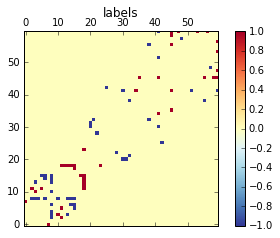

0.925634324551
(60, 60)
Limit: 0.925634324551


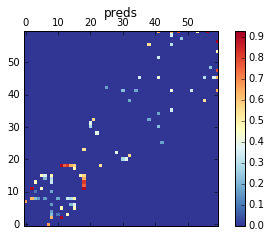

In [23]:
zoomIn_window = (400,460)
NumberOfNodes=2272
plot_prediction(change_scale(preds_chr1_2d)+change_scale(preds_chr1_2d).T, change_scale(labels_chr1_2d)+change_scale(labels_chr1_2d).T, zoomIn_window, )